In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
data = pd.read_csv('monthly_bank.csv')

In [6]:
data = data.sample(frac=1).reset_index(drop=True)

In [7]:
count = 0
while count < 5:
    data = data.sample(frac=1).reset_index(drop=True)
    count +=1

In [8]:
df_100k = data.sample(100000).reset_index(drop=True)

In [9]:
df_100k.to_csv('100k_bank.csv', index=False)

In [10]:
df_100k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 69 columns):
age                    100000 non-null float64
gender                 99969 non-null object
nationality            99969 non-null object
expat                  100000 non-null object
status                 99969 non-null object
account tier           100000 non-null object
employment             100000 non-null object
joint                  100000 non-null object
industry               100000 non-null object
education              99996 non-null object
job position           100000 non-null object
credit card            99996 non-null object
debit card             99996 non-null object
salary                 100000 non-null float64
monthly deposit avg    100000 non-null float64
monthly expense avg    100000 non-null float64
credit card expense    100000 non-null float64
payme                  99996 non-null object
payme deposit          100000 non-null float64
payme expense    

In [11]:
df = df_100k.copy()

In [12]:
df.head()

,age,gender,nationality,expat,status,account tier,employment,joint,industry,education,job position,credit card,debit card,salary,monthly deposit avg,monthly expense avg,credit card expense,payme,payme deposit,payme expense,"feb 10, 2017","feb 25, 2017","mar 10, 2017","mar 25, 2017","apr 10, 2017","apr 25, 2017","may 10, 2017","may 25, 2017","jun 10, 2017","jun 25, 2017","jul 10, 2017","jul 25, 2017","aug 10, 2017","aug 25, 2017","sep 10, 2017","sep 25, 2017","oct 10, 2017","oct 25, 2017","nov 10, 2017","nov 25, 2017","dec 10, 2017","dec 25, 2017","jan 10, 2018","jan 25, 2018","feb 10, 2018","feb 25, 2018","mar 10, 2018","mar 25, 2018","apr 10, 2018","apr 25, 2018","may 10, 2018","may 25, 2018","jun 10, 2018","jun 25, 2018","jul 10, 2018","jul 25, 2018","aug 10, 2018","aug 25, 2018","sep 10, 2018","sep 25, 2018","oct 10, 2018","oct 25, 2018","nov 10, 2018","nov 25, 2018","dec 10, 2018","dec 25, 2018","jan 10, 2019","jan 25, 2019","feb 10, 2019"
0,33.0,m,hong kong,no,divorce,advance,full time,yes,real estate,secondary,senior,yes,yes,92058.77,78249.950,27387.48,6846.870,no,0.0,0.0,98108.12,185175.97,135847.46,224802.28,200096.33,250511.65,216277.30,265074.53,242382.19,336663.75,317550.87,356220.74,289787.75,386439.58,316984.71,474281.59,396042.52,355719.35,337559.25,436599.66,402365.31,432553.73,398319.38,500397.80,466163.45,489972.06,364590.17,332130.09,268106.17,259767.09,180426.19,310411.37,276177.02,265820.23,243165.17,289273.61,229535.33,277006.75,194217.92,245221.08,168789.38,185279.50,135940.64,160642.94,101126.87,215252.18,181017.83,194450.83,160216.48
1,41.0,f,hong kong,no,married,personal,full time,yes,social service,tertiary,associate,yes,yes,27972.50,18461.850,3692.37,2215.420,no,0.0,0.0,92993.66,89164.41,79093.79,78044.51,57709.38,49511.30,34882.81,58679.13,50132.77,44586.50,38678.71,65711.64,65784.24,96883.00,72780.17,91242.02,51200.54,76628.63,70720.84,89182.69,83274.90,116997.26,66653.68,93627.08,87719.29,122108.31,69720.31,97000.38,86537.96,68249.88,59224.99,85455.52,63638.18,65680.02,47817.78,53023.70,44760.11,50577.57,35735.82,54197.67,28973.93,37948.62,25632.66,50708.69,44800.90,69589.03,63681.24,53393.01,52233.74
2,62.0,m,white,no,single,advance,full time,no,retail,tertiary,associate,yes,yes,27840.96,20880.720,9396.32,3758.530,no,0.0,0.0,103219.24,93074.97,71928.11,83527.95,73891.76,85295.23,64926.34,77226.35,57664.35,70690.56,60412.50,85357.88,64982.73,64397.59,40994.19,55687.42,38279.31,44370.02,28093.65,44076.93,30922.08,54392.94,37114.28,60894.75,42965.91,57461.97,39876.41,63794.99,45576.13,69779.69,50962.36,86211.70,76709.69,87831.37,59741.22,60466.46,49677.19,74085.81,63977.51,76372.41,66378.44,78533.24,65378.39,77633.20,58030.52,59183.43,41425.72,56075.80,45067.00
3,41.0,f,white,no,divorce,advance,full time,no,import/export,tertiary,manager,yes,yes,80431.38,60323.540,12064.71,3016.180,no,0.0,0.0,102859.22,146864.48,118605.23,161035.89,145955.00,216592.47,161209.26,265839.36,263296.39,388343.92,391926.18,407024.75,391943.86,407040.66,313567.82,392585.93,339754.54,420081.98,405001.09,418792.17,423896.84,508431.40,518018.04,694009.90,712875.46,579899.25,593059.28,784059.38,692080.64,902885.02,932194.34,1042143.77,1078416.02,1195676.54,1180595.65,930689.39,824047.65,928589.75,913508.86,730374.30,715293.41,814397.80,839282.76,674704.73,692605.03,564696.43,494653.99,499479.78,508618.83
4,77.0,f,other asian,yes,divorce,personal,full time,yes,service,primary,associate,yes,no,13671.67,9570.169,4306.58,1291.974,no,0.0,0.0,20324.24,28399.69,21661.08,24985.00,16478.48,20838.92,12192.29,20674.34,12814.42,17907.67,9847.29,19417.46,13127.96,22698.13,13679.66,23249.83,16768.71,25021.94,15538.71,23853.44,17342.14,26912.31,20248.07,23854.59,18256.04,26434.90,16669.08,24927.29,18362.30,27932.47,22333.92,31904.09,21044.43,29083.87,18788.25,28358.42,22759.87,30713.54,21347.74,29372.01,22584.78,30547.20,19958.92,29529.09,19144.43,28714.60,21960.24,25224.33,18644.49


In [13]:
df = df.rename(columns={'feb 10, 2019': 'target'})

In [14]:
# missing values
missing = df.isnull().sum()
pct_missing = (df.isnull().sum()/len(df_100k)) * 100
df_missing =  pd.concat([missing, pct_missing], axis=1, keys=['missing', 'pct missing'])
df_missing[missing > 0]

,missing,pct missing
gender,31,0.031
nationality,31,0.031
status,31,0.031
education,4,0.004
credit card,4,0.004
debit card,4,0.004
payme,4,0.004


In [15]:
df['nationality'].value_counts()

hong kong      69535
china          17763
white           7917
other asian     4754
Name: nationality, dtype: int64

In [16]:
missing_idx = list(df_missing[missing > 0].index)

In [17]:
missing_idx

['gender',
 'nationality',
 'status',
 'education',
 'credit card',
 'debit card',
 'payme']

In [18]:
# fill in missing values with max value of missing
for i in missing_idx:
    df[i] = df[i].fillna(df[i].value_counts().index[0])

In [19]:
# missing values
missing = df.isnull().sum()
pct_missing = (df.isnull().sum()/len(df)) * 100
df_missing =  pd.concat([missing, pct_missing], axis=1, keys=['missing', 'pct missing'])
df_missing[missing > 0]

,missing,pct missing


In [20]:
df.describe()

,age,salary,monthly deposit avg,monthly expense avg,credit card expense,payme deposit,payme expense,"feb 10, 2017","feb 25, 2017","mar 10, 2017","mar 25, 2017","apr 10, 2017","apr 25, 2017","may 10, 2017","may 25, 2017","jun 10, 2017","jun 25, 2017","jul 10, 2017","jul 25, 2017","aug 10, 2017","aug 25, 2017","sep 10, 2017","sep 25, 2017","oct 10, 2017","oct 25, 2017","nov 10, 2017","nov 25, 2017","dec 10, 2017","dec 25, 2017","jan 10, 2018","jan 25, 2018","feb 10, 2018","feb 25, 2018","mar 10, 2018","mar 25, 2018","apr 10, 2018","apr 25, 2018","may 10, 2018","may 25, 2018","jun 10, 2018","jun 25, 2018","jul 10, 2018","jul 25, 2018","aug 10, 2018","aug 25, 2018","sep 10, 2018","sep 25, 2018","oct 10, 2018","oct 25, 2018","nov 10, 2018","nov 25, 2018","dec 10, 2018","dec 25, 2018","jan 10, 2019","jan 25, 2019",target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,44.939120,24524.240434,19076.296663,6960.588510,2424.366741,485.535572,727.102572,8.161916e+04,9.270559e+04,7.639310e+04,8.828003e+04,7.261789e+04,8.518693e+04,7.024277e+04,8.322887e+04,6.867283e+04,8.193624e+04,6.771430e+04,8.127125e+04,6.733185e+04,8.107882e+04,6.732892e+04,8.110070e+04,6.747309e+04,8.143721e+04,6.798306e+04,8.190014e+04,6.847317e+04,8.254273e+04,6.928971e+04,8.332605e+04,7.019852e+04,8.425470e+04,7.125460e+04,8.540532e+04,7.240151e+04,8.638361e+04,7.341324e+04,8.745955e+04,7.460389e+04,8.859674e+04,7.560096e+04,8.956020e+04,7.656746e+04,9.042379e+04,7.757919e+04,9.152843e+04,7.861453e+04,9.253555e+04,7.968470e+04,9.364600e+04,8.098852e+04,9.475128e+04,8.198189e+04,9.584753e+04,8.300678e+04
std,14.772561,25776.599316,17826.307162,7481.098578,3198.888734,533.693274,811.391123,5.709085e+04,6.177325e+04,5.577670e+04,6.291485e+04,5.735356e+04,6.615067e+04,6.124657e+04,7.083917e+04,6.577149e+04,7.571849e+04,7.114492e+04,8.130925e+04,7.715119e+04,8.721331e+04,8.295609e+04,9.265970e+04,8.847529e+04,9.814667e+04,9.490137e+04,1.035444e+05,1.000685e+05,1.095051e+05,1.066688e+05,1.155790e+05,1.131576e+05,1.219905e+05,1.199255e+05,1.284913e+05,1.267112e+05,1.346445e+05,1.330229e+05,1.408189e+05,1.397729e+05,1.468905e+05,1.456130e+05,1.525907e+05,1.515108e+05,1.572891e+05,1.569818e+05,1.631362e+05,1.631177e+05,1.693299e+05,1.703456e+05,1.760952e+05,1.777784e+05,1.835238e+05,1.835874e+05,1.889668e+05,1.894544e+05
min,15.000000,0.000000,2145.725000,295.900000,0.000000,-141.420000,-627.820000,-4.146072e+04,-3.688107e+04,-3.728848e+04,-3.107339e+04,-3.177119e+04,-2.583197e+04,-2.679184e+04,-2.888588e+04,-3.157465e+04,-2.281301e+04,-2.675178e+04,-1.566996e+04,-2.156648e+04,-3.053365e+04,-3.133378e+04,-2.503232e+04,-3.022975e+04,-2.853358e+04,-3.408114e+04,-4.059798e+04,-4.089489e+04,-3.887840e+04,-3.747530e+04,-3.966748e+04,-4.688542e+04,-4.081871e+04,-4.029083e+04,-3.882165e+04,-3.438132e+04,-3.400687e+04,-3.463805e+04,-5.077939e+04,-5.057195e+04,-5.073675e+04,-5.753145e+04,-4.960805e+04,-5.628988e+04,-6.366342e+04,-6.196659e+04,-5.121562e+04,-4.486316e+04,-3.813020e+04,-4.366425e+04,-4.298106e+04,-4.231835e+04,-5.030559e+04,-5.754364e+04,-5.243974e+04,-5.172422e+04
25%,38.000000,4996.747500,6832.357500,2113.637500,479.759500,0.000000,0.000000,4.788500e+04,5.220798e+04,3.885228e+04,4.330126e+04,3.214725e+04,3.868271e+04,2.831740e+04,3.552420e+04,2.562821e+04,3.296565e+04,2.341309e+0

In [21]:
# data clean all negative values to 0
cols = list(df.columns)
cols

['age',
 'gender',
 'nationality',
 'expat',
 'status',
 'account tier',
 'employment',
 'joint',
 'industry',
 'education',
 'job position',
 'credit card',
 'debit card',
 'salary',
 'monthly deposit avg',
 'monthly expense avg',
 'credit card expense',
 'payme',
 'payme deposit',
 'payme expense',
 'feb 10, 2017',
 'feb 25, 2017',
 'mar 10, 2017',
 'mar 25, 2017',
 'apr 10, 2017',
 'apr 25, 2017',
 'may 10, 2017',
 'may 25, 2017',
 'jun 10, 2017',
 'jun 25, 2017',
 'jul 10, 2017',
 'jul 25, 2017',
 'aug 10, 2017',
 'aug 25, 2017',
 'sep 10, 2017',
 'sep 25, 2017',
 'oct 10, 2017',
 'oct 25, 2017',
 'nov 10, 2017',
 'nov 25, 2017',
 'dec 10, 2017',
 'dec 25, 2017',
 'jan 10, 2018',
 'jan 25, 2018',
 'feb 10, 2018',
 'feb 25, 2018',
 'mar 10, 2018',
 'mar 25, 2018',
 'apr 10, 2018',
 'apr 25, 2018',
 'may 10, 2018',
 'may 25, 2018',
 'jun 10, 2018',
 'jun 25, 2018',
 'jul 10, 2018',
 'jul 25, 2018',
 'aug 10, 2018',
 'aug 25, 2018',
 'sep 10, 2018',
 'sep 25, 2018',
 'oct 10, 2018',
 

In [22]:
cols.index('payme deposit')

18

In [23]:
for i in cols[18:]:
    df[i] = df[i].apply(lambda x: x if x > 0 else 0)

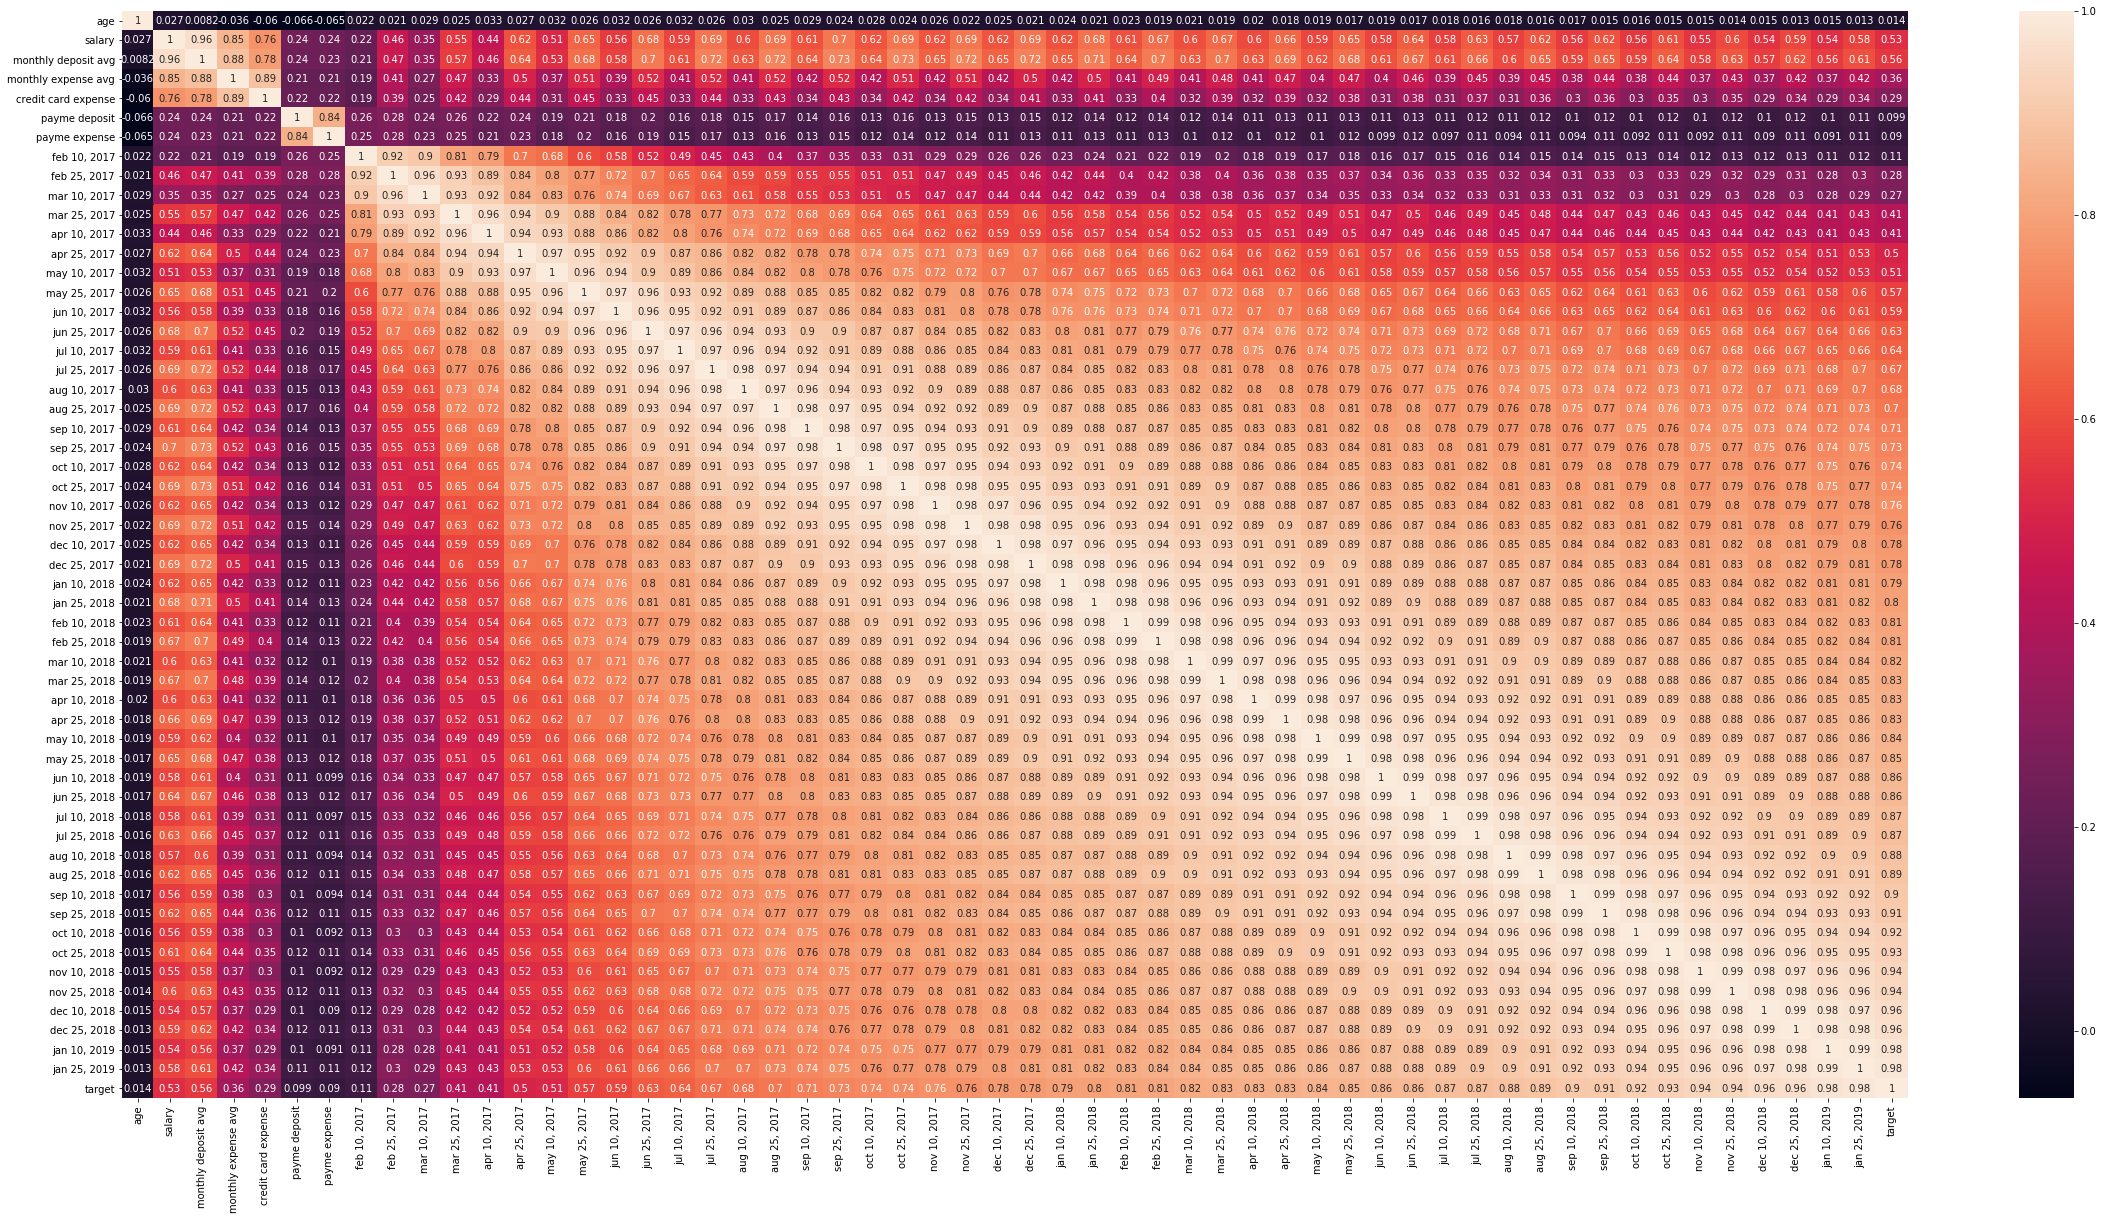

In [24]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot=True)

In [25]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'monthly deposit avg vs target')

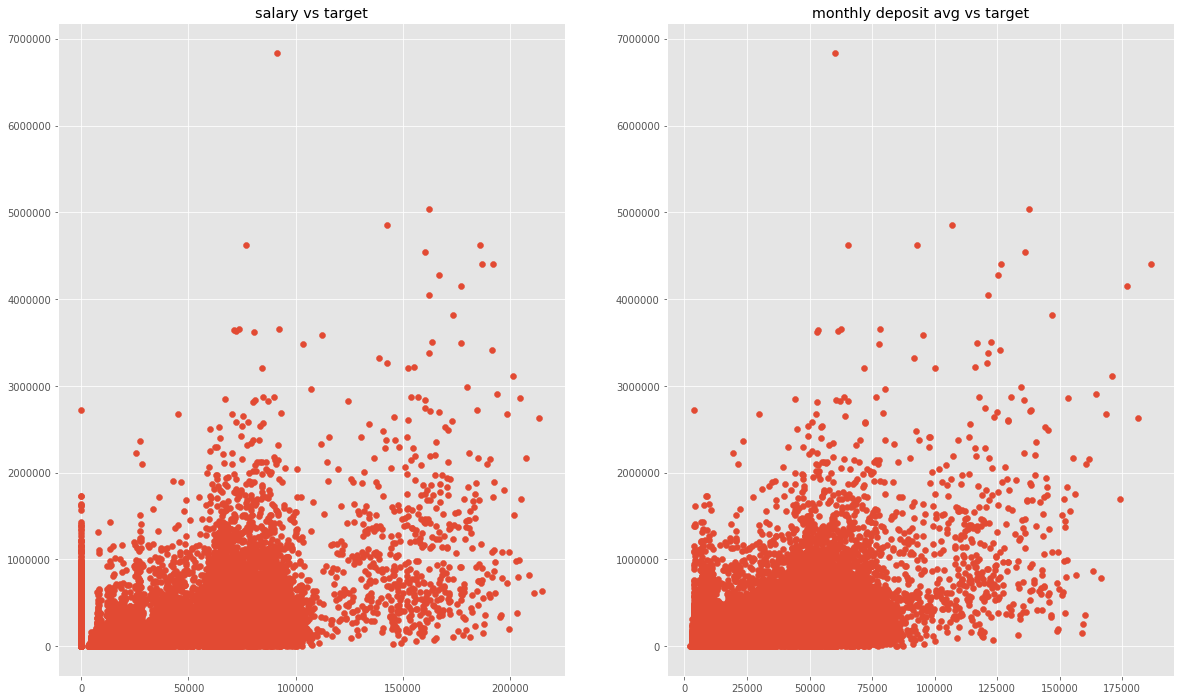

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,12))
ax[0].scatter(x='salary', y='target', data=df)
ax[1].scatter(x='monthly deposit avg', y='target', data=df)
ax[0].set_title('salary vs target')
ax[1].set_title('monthly deposit avg vs target')

In [27]:
datetime_transpose = df[cols[20:]].T

In [28]:
datetime_transpose = datetime_transpose.iloc[:-1] 

In [29]:
datetime_transpose.index = pd.to_datetime(datetime_transpose.index)

Text(0.5, 1.0, 'datetime graph of monthly checks')

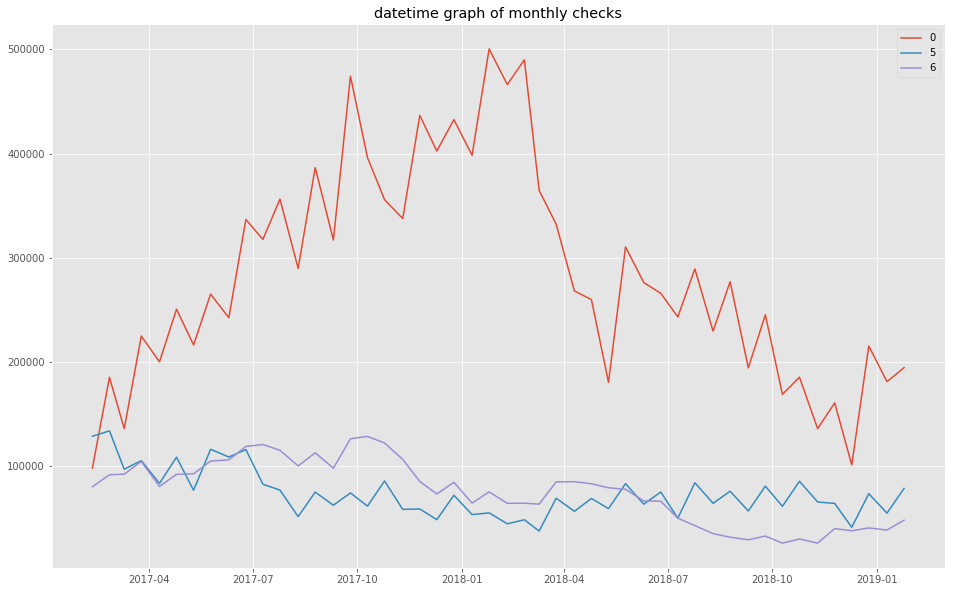

In [32]:
plt.figure(figsize=(16,10))
plt.plot(datetime_transpose[0])
plt.plot(datetime_transpose[5])
plt.plot(datetime_transpose[6])
plt.legend()
plt.title('datetime graph of monthly checks')

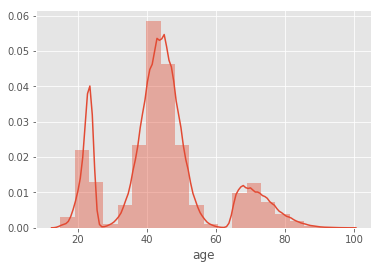

In [37]:
sns.distplot(df['age'],bins=20)

In [39]:
# cut age to bins to convert age to categorical 
pd.cut(df['age'],4).value_counts()

(35.75, 56.5]      65566
(14.917, 35.75]    18875
(56.5, 77.25]      12858
(77.25, 98.0]       2701
Name: age, dtype: int64

In [40]:
def age_range(col):
    if (col < 35):
        return 'millenial'
    elif (col >= 35) & (col < 56):
        return 'gen x'
    elif (col >= 56) & (col < 77):
        return 'baby boomers'
    else:
        return 'senior'

In [42]:
df['age_range'] = df['age'].apply(age_range)

In [45]:
# factorize categorical columns to 1d 
cols = list(df.columns)
for i in cols:
    if df[i].dtype == 'object':
        df[i + '_factorize'] = pd.factorize(df[i])[0]
    else:
        pass

In [46]:
df.head()

,age,gender,nationality,expat,status,account tier,employment,joint,industry,education,job position,credit card,debit card,salary,monthly deposit avg,monthly expense avg,credit card expense,payme,payme deposit,payme expense,"feb 10, 2017","feb 25, 2017","mar 10, 2017","mar 25, 2017","apr 10, 2017","apr 25, 2017","may 10, 2017","may 25, 2017","jun 10, 2017","jun 25, 2017","jul 10, 2017","jul 25, 2017","aug 10, 2017","aug 25, 2017","sep 10, 2017","sep 25, 2017","oct 10, 2017","oct 25, 2017","nov 10, 2017","nov 25, 2017","dec 10, 2017","dec 25, 2017","jan 10, 2018","jan 25, 2018","feb 10, 2018","feb 25, 2018","mar 10, 2018","mar 25, 2018","apr 10, 2018","apr 25, 2018","may 10, 2018","may 25, 2018","jun 10, 2018","jun 25, 2018","jul 10, 2018","jul 25, 2018","aug 10, 2018","aug 25, 2018","sep 10, 2018","sep 25, 2018","oct 10, 2018","oct 25, 2018","nov 10, 2018","nov 25, 2018","dec 10, 2018","dec 25, 2018","jan 10, 2019","jan 25, 2019",target,age_range,gender_factorize,nationality_factorize,expat_factorize,status_factorize,account tier_factorize,employment_factorize,joint_factorize,industry_factorize,education_factorize,job position_factorize,credit card_factorize,debit card_factorize,payme_factorize,age_range_factorize
0,33.0,m,hong kong,no,divorce,advance,full time,yes,real estate,secondary,senior,yes,yes,92058.77,78249.950,27387.48,6846.870,no,0.0,0.0,98108.12,185175.97,135847.46,224802.28,200096.33,250511.65,216277.30,265074.53,242382.19,336663.75,317550.87,356220.74,289787.75,386439.58,316984.71,474281.59,396042.52,355719.35,337559.25,436599.66,402365.31,432553.73,398319.38,500397.80,466163.45,489972.06,364590.17,332130.09,268106.17,259767.09,180426.19,310411.37,276177.02,265820.23,243165.17,289273.61,229535.33,277006.75,194217.92,245221.08,168789.38,185279.50,135940.64,160642.94,101126.87,215252.18,181017.83,194450.83,160216.48,millenial,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,41.0,f,hong kong,no,married,personal,full time,yes,social service,tertiary,associate,yes,yes,27972.50,18461.850,3692.37,2215.420,no,0.0,0.0,92993.66,89164.41,79093.79,78044.51,57709.38,49511.30,34882.81,58679.13,50132.77,44586.50,38678.71,65711.64,65784.24,96883.00,72780.17,91242.02,51200.54,76628.63,70720.84,89182.69,83274.90,116997.26,66653.68,93627.08,87719.29,122108.31,69720.31,97000.38,86537.96,68249.88,59224.99,85455.52,63638.18,65680.02,47817.78,53023.70,44760.11,50577.57,35735.82,54197.67,28973.93,37948.62,25632.66,50708.69,44800.90,69589.03,63681.24,53393.01,52233.74,gen x,1,0,0,1,1,0,0,1,1,1,0,0,0,1
2,62.0,m,white,no,single,advance,full time,no,retail,tertiary,associate,yes,yes,27840.96,20880.720,9396.32,3758.530,no,0.0,0.0,103219.24,93074.97,71928.11,83527.95,73891.76,85295.23,64926.34,77226.35,57664.35,70690.56,60412.50,85357.88,64982.73,64397.59,40994.19,55687.42,38279.31,44370.02,28093.65,44076.93,30922.08,54392.94,37114.28,60894.75,42965.91,57461.97,39876.41,63794.99,45576.13,69779.69,50962.36,86211.70,76709.69,87831.37,59741.22,60466.46,49677.19,74085.81,63977.51,76372.41,66378.44,78533.24,65378.39,77633.20,58030.52,59183.43,41425.72,56075.80,45067.00,baby boomers,0,1,0,2,0,0,1,2,1,1,0,0,0,2
3,41.0,f,white,no,divorce,advance,full time,no,import/export,tertiary,manager,yes,yes,80431.38,60323.540,12064.71,3016.180,no,0.0,0.0,102859.22,146864.48,118605.23,161035.89,145955.00,216592.47,161209.26,265839.36,263296.39,388343.92,391926.18,407024.75,391943.86,407040.66,313567.82,392585.93,339754.54,420081.98,405001.09,418792.17,423896.84,508431.40,518018.04,694009.90,712875.46,579899.25,593059.28,784059.38,692080.64,902885.02,932194.34,1042143.77,1078416.02,1195676.54,1180595.65,930689.39,824047.65,928589.75,913508.86,730374.30,715293.41,814397.80,839282.76,674704.73,692605.03,564696.43,494653.99,499479.78,508618.83,gen x,1,1,0,0,0,0,1,3,1,2,0,0,0,1
4,77.0,f,other asian,yes,divorce,personal,full time,yes,service,primary,associate,yes,no,13671.67,9570.169,4306.58,1291.974,no,0.0,0.0,20324.24,28399.69,21661.08,24985.00,16478.48,20838.92,12192.29,20674.34,12814

In [66]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [51]:
feats= []
for i in list(df.columns):
    if df[i].dtype != 'object':
        feats.append(i)

In [54]:
df_feats = df[feats[1:]]

In [55]:
X = df_feats.drop('target', axis=1)
y = df_feats['target']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=321)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 68), (20000, 68), (80000,), (20000,))

In [58]:
# scale data
sc = StandardScaler()

In [59]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [69]:
# linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('mean cv:', np.mean(cross_val_score(linreg, X_train, y_train, cv=10)))
print('model score:', linreg.score(X_train, y_train))

mean cv: 0.9708425523040425
model score: 0.9718499013835068


In [61]:
lr_predict = linreg.predict(X_test)

In [64]:
# rmse
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_predict)))

# r2_score
print('r2_score:', r2_score(y_test, lr_predict))

RMSE: 35509.888265800495
r2_score: 0.9696256709097282


In [77]:
# lasso
lasso = Lasso(normalize=True)
lasso.fit(X_train, y_train)
print('mean cv:', np.mean(cross_val_score(lasso, X_train, y_train, cv=10)))
print('model score:', lasso.score(X_train, y_train))

mean cv: 0.9712625685072147
model score: 0.971454413679779


In [78]:
lasso_predict = lasso.predict(X_test)

In [79]:
# rmse
print('RMSE:', np.sqrt(mean_squared_error(y_test, lasso_predict)))

# r2_score
print('r2_score:', r2_score(y_test, lasso_predict))

RMSE: 35294.948132429585
r2_score: 0.9699922675834537


In [80]:
# ridge
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)
print('mean cv:', np.mean(cross_val_score(ridge, X_train, y_train,cv=10)))
print('model score:', ridge.score(X_train, y_train))

mean cv: 0.9132684743423557
model score: 0.9135164994427944


In [81]:
ridge_predict = ridge.predict(X_test)

In [82]:
# rmse
print('RMSE:', np.sqrt(mean_squared_error(y_test, ridge_predict)))

# r2_score
print('r2_score:', r2_score(y_test, ridge_predict))

RMSE: 63837.77916528017
r2_score: 0.9018334286833344


Without using PCA, the best score is from Lasso.

Text(0, 0.5, 'cumulative explained variance')

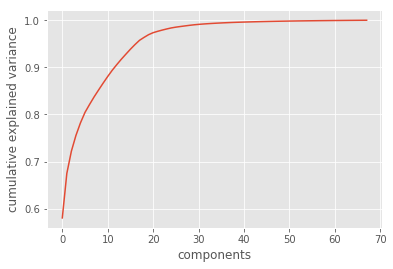

In [103]:
# PCA
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')

In [96]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [97]:
# linear
linreg.fit(X_train_pca, y_train)
print('pca mean cv:', np.mean(cross_val_score(linreg, X_train_pca, y_train, cv=10)))
print('model score:', linreg.score(X_train_pca, y_train))

pca mean cv: 0.9308399931006199
model score: 0.9316190032433498


In [98]:
lr_pca_predict = linreg.predict(X_test_pca)

In [99]:
# rmse
print('pca rmse:', np.sqrt(mean_squared_error(y_test, lr_pca_predict)))

# r2_score
print('pca r2_score:', r2_score(y_test, lr_pca_predict))

pca rmse: 53987.58067405892
pca r2_score: 0.9297905106194962


In [100]:
# lasso
lasso.fit(X_train_pca, y_train)
print('pca mean cv:', np.mean(cross_val_score(lasso, X_train_pca, y_train, cv=10)))
print('pca model score:', lasso.score(X_train_pca, y_train))

pca mean cv: 0.930809264145204
pca model score: 0.9315725898657696


In [101]:
lasso_pca_predict = lasso.predict(X_test_pca)

In [102]:
# rmse
print('pca rmse:', np.sqrt(mean_squared_error(y_test, lasso_pca_predict)))

# r2_score
print('pca r2_score:', r2_score(y_test, lasso_pca_predict))

pca rmse: 54167.227922584185
pca r2_score: 0.9293224797639229


In [104]:
# ridge
ridge.fit(X_train_pca, y_train)
print('pca mean cv:', np.mean(cross_val_score(ridge, X_train_pca, y_train, cv=10)))
print('pca model score:', ridge.score(X_train_pca, y_train))

pca mean cv: 0.6978845358675482
pca model score: 0.6987142524325117


In [105]:
ridge_pca_predict = ridge.predict(X_test_pca)

In [106]:
# rmse
print('pca rmse:', np.sqrt(mean_squared_error(y_test, ridge_pca_predict)))

# r2_score
print('pca r2_score:', r2_score(y_test, ridge_pca_predict))

pca rmse: 114548.6504473753
pca r2_score: 0.6839265358535558


Text(0.5, 0, 'target')

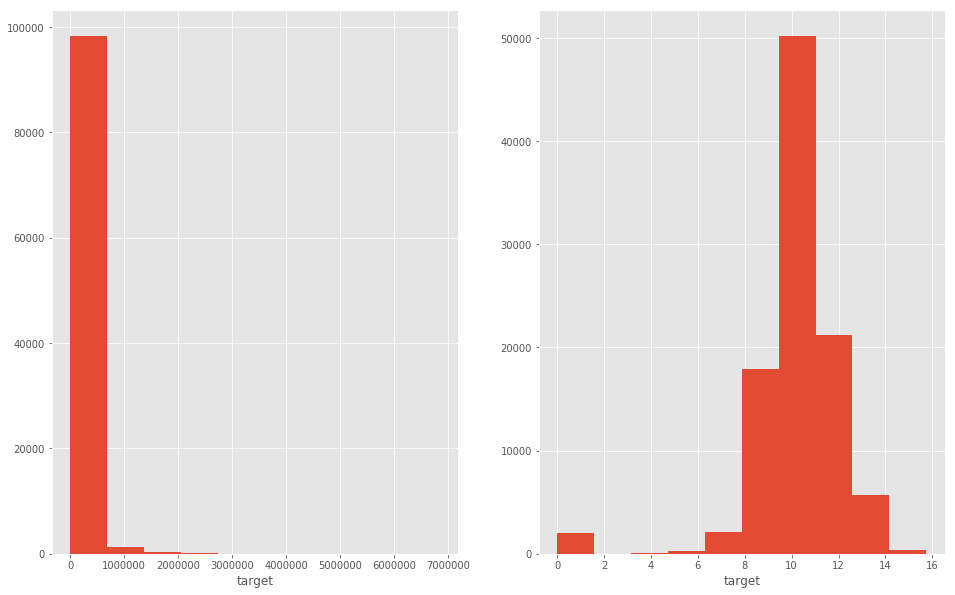

In [119]:
fig, ax = plt.subplots(1,2, figsize=(16,10))
ax[0].hist(df['target'])
ax[1].hist(np.log1p(df['target']))
ax[0].set_xlabel('target')
ax[1].set_xlabel('target')

In [121]:
X_log1p = np.log1p(df_feats.drop('target', axis=1))
y_log1p = np.log1p(df['target'])

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X_log1p, y_log1p, test_size=0.20, random_state=321)

In [124]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [126]:
linreg.fit(x_train, y_train)
print('log1p mean cv:', np.mean(cross_val_score(linreg, x_train, y_train, cv=10)))
print('log1p model score:', linreg.score(x_train, y_train))

log1p mean cv: 0.8874806974576241
log1p model score: 0.8883293995048146


In [127]:
lr_log1p_predict = linreg.predict(x_test)

In [132]:
print('log1p rmse:',np.sqrt(mean_squared_error(y_test, lr_log1p_predict)))
print('log1p r2_score:', r2_score(y_test, lr_log1p_predict))

log1p rmse: 0.6956031132208611
log1p r2_score: 0.876714135221577


### Conclusion
With PCA and using np.log1p to normal distribute the target variable did not improve the model's score. To have a more robust model, improve data collection beyond surveys about HKers spending habits, saving habits, and HK govt annual digest stats. The best model prediction is Lasso.